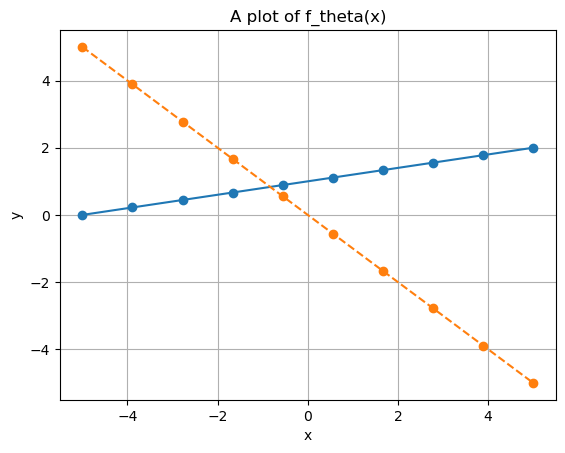

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameterized function f
def f(theta, x):
    return theta[0] + theta[1] * x

# Choose two different values for the parameters
theta = (1, 0.2)
theta2 = (0, -1)

# Visualize the model prediction in the range [-5, 5]
xx = np.linspace(-5, 5, 10)
yy = f(theta, xx)
yy2 = f(theta2, xx)

plt.plot(xx, yy, 'o-')
plt.plot(xx, yy2, 'o--')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("A plot of f_theta(x)")
plt.show()

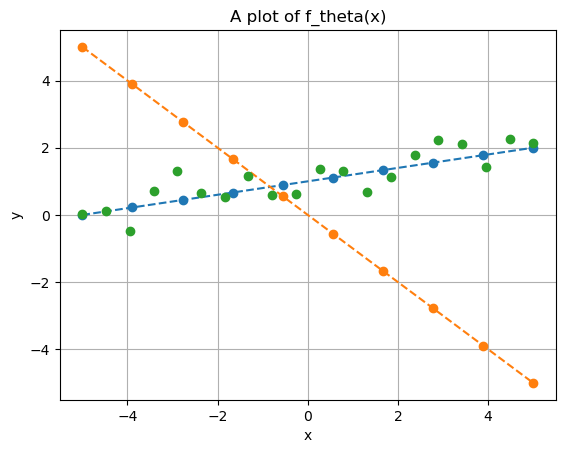

In [2]:
# Define synthetic datapoints
x_data = np.linspace(-5, 5, 20)
y_data = 1 + 0.2 * x_data + np.random.normal(0, 0.5, x_data.shape)

# Plot
plt.plot(xx, yy, 'o--')
plt.plot(xx, yy2, 'o--')
plt.plot(x_data, y_data, 'o')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("A plot of f_theta(x)")
plt.show()

In [3]:
import numpy as np

def l(theta):
    """
    We assume theta to be a 2-dimensional vector (theta_1, theta_2)
    in the form of a numpy array with shape (2,)
    """
    return (theta[0] - 1)**2 + (theta[1] - 2)**2

def grad_l(theta):
    """
    NOTE: It is expected to return a numpy array with shape (2,)
    """
    return np.array([2 * (theta[0] - 1), 2 * (theta[1] - 2)])

def GD(l, grad_l, theta_0, eta, maxit, tolL, toltheta):
    for k in range(maxit):
        # GD step        
        theta = theta_0 - eta * grad_l(theta_0)

        # Check stopping criteria
        if (np.linalg.norm(grad_l(theta)) < tolL) or (np.linalg.norm(theta - theta_0) < toltheta):
            break

        # Update of theta_0
        theta_0 = theta
    return theta, k

def backtracking(L, grad_L, theta, eta0=1.0, beta=0.5, c=1e-4):
    """
    Return a step size eta that satisfies the Armijo condition:
        L(theta - eta*g) <= L(theta) - c * eta * ||g||^2
    Inputs:
      - L:      R^n -> R
      - grad_L: R^n -> R^d
      - theta:  current point (np.ndarray)
      - eta0:   initial step size
      - beta:   shrinking factor in (0,1)
      - c:      Armijo constant in (0,1)
    """
    eta = eta0
    g = grad_L(theta)
    g_norm2 = np.dot(g, g)
    while L(theta - eta * g) > L(theta) - c * eta * g_norm2:
        eta *= beta
    return eta

def GD_backtracking(l, grad_l, theta_0, maxit, tolL, toltheta):
    for k in range(maxit):
        # Compute eta
        eta = backtracking(l, grad_l, theta_0)

        # GD step        
        theta = theta_0 - eta * grad_l(theta_0)

        # Check stopping criteria
        if (np.linalg.norm(grad_l(theta)) < tolL) or (np.linalg.norm(theta - theta_0) < toltheta):
            break

        # Update of theta_0
        theta_0 = theta
    return theta, k

# Test the algorithm
theta_0 = np.array([0, 0])
eta = 0.1
maxit = 1000
tolL = 1e-6
toltheta = 1e-6

theta_opt, k = GD(l, grad_l, theta_0, eta, maxit, tolL, toltheta)
print(theta_opt, k)

theta_0 = np.array([0, 0])
eta = 0.1
maxit = 1000
tolL = 1e-6
toltheta = 1e-6

theta_opt_backtracking, k_backtracking = GD_backtracking(l, grad_l, theta_0, maxit, tolL, toltheta)
print(theta_opt_backtracking, k_backtracking)

[0.99999847 1.99999694] 59
[1. 2.] 0


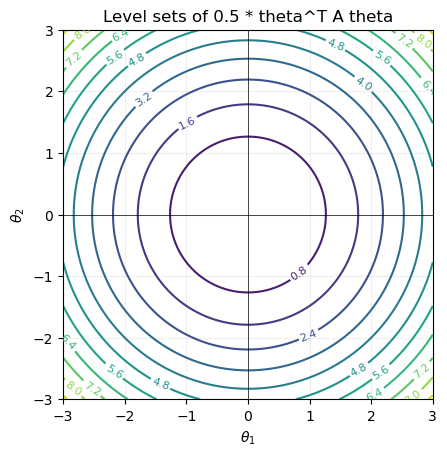

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def quad_levelsets(A, xlim=(-3,3), ylim=(-3,3), ngrid=400, 
                   ncontours=12, title=None):
    xs = np.linspace(xlim[0], xlim[1], ngrid)
    ys = np.linspace(ylim[0], ylim[1], ngrid)
    X, Y = np.meshgrid(xs, ys)
    Z = 0.5*(A[0,0]*X**2 + 2*A[0,1]*X*Y + A[1,1]*Y**2)  # theta^T A theta, left-multiplied convention
    cs = plt.contour(X, Y, Z, levels=ncontours)
    plt.clabel(cs, inline=True, fontsize=8)
    plt.axhline(0, lw=0.5, color='k')
    plt.axvline(0, lw=0.5, color='k')
    plt.gca().set_aspect('equal', 'box')
    if title:
        plt.title(title)
    plt.xlabel(r'$\theta_1$')
    plt.ylabel(r'$\theta_2$')
    plt.grid(alpha=0.2)
    plt.show()

# Example: ill-conditioned ellipse
A = np.diag([1.0, 1.0])  # lambda1 << lambda2
quad_levelsets(A, title='Level sets of 0.5 * theta^T A theta')

In [17]:
# Try to implement the GD algorithm on the functions:
# l1(theta) = theta_1^2 + theta_2^2
# l2(theta) = 10theta_1^2 + theta_2^2
# and compare against GD with backtracking
# set theta0 = [1, 1] for both

def l1(theta):
    """
    We assume theta to be a 2-dimensional vector (theta_1, theta_2)
    in the form of a numpy array with shape (2,)
    """
    return (theta[0])**2 + (theta[1])**2

def grad_l1(theta):
    """
    NOTE: It is expected to return a numpy array with shape (2,)
    """
    return np.array([2 * (theta[0]), 2 * (theta[1])])

theta_0 = np.array([1, 1])
theta_sol1, it1 = GD_backtracking(l1, grad_l1, theta_0, 
                maxit=100, tolL=1e-10, toltheta=1e-10)
print(f"Solution: {theta_sol1}, it. {it1}")


def l2(theta):
    """
    We assume theta to be a 2-dimensional vector (theta_1, theta_2)
    in the form of a numpy array with shape (2,)
    """
    return 10*(theta[0])**2 + (theta[1])**2

def grad_l2(theta):
    """
    NOTE: It is expected to return a numpy array with shape (2,)
    """
    return np.array([20 * (theta[0]), 2 * (theta[1])])

theta_0 = np.array([1, 1])
theta_sol2, it2 = GD_backtracking(l2, grad_l2, theta_0, 
                maxit=500, tolL=1e-10, toltheta=1e-10)
print(f"Solution: {theta_sol2}, it. {it2}")

Solution: [0. 0.], it. 0
Solution: [-1.43860605e-11  1.84322286e-10], it. 86
